In [ ]:
import pandas as pd
import json
import seaborn as sns
import matplotlib.pylab as plt
import matplotlib.pyplot as plt
from random import random
from scipy.interpolate import interp1d
import numpy as np
from time import sleep

In [ ]:
import pandas as pd
import json
import seaborn as sns
import matplotlib.pylab as plt
import matplotlib.pyplot as plt
from random import random
from scipy.interpolate import interp1d
import numpy as np
from time import sleep

In [ ]:
sns.set(rc={"figure.figsize":(18, 9)}) 

In [ ]:
with open('data/dados_discentes.json', 'r') as f:
    data = json.load(f)
data

In [ ]:
df = {
    'campus': [],
    'ano': [],
    'semestre': [],
    'curso': [],
    'tipo_curso': [],
    'modalidade': [],
    'sexo': [],
    'escolaridade': [],
    'algo': [],
    'cor': [],
    'nascimento': [],
    'status': []
}

for itens in data:
    item = itens['itens']
    df['campus'].append(item[0]['valor'])
    df['ano'].append(item[1]['valor'])
    df['semestre'].append(item[2]['valor'])
    df['curso'].append(item[3]['valor'])
    df['tipo_curso'].append(item[4]['valor'])
    df['modalidade'].append(item[5]['valor'])
    df['sexo'].append(item[6]['valor'])
    df['escolaridade'].append(item[7]['valor'])
    df['algo'].append(item[8]['valor'])
    df['cor'].append(item[9]['valor'])
    df['nascimento'].append(item[10]['valor'])
    df['status'].append(item[11]['valor'])

df.keys()

In [ ]:
df = pd.DataFrame(df)
df

In [ ]:
classes = []

for renda in df['algo']:
    if renda not in classes:
        classes.append(renda)

rename_renda = lambda x: classes.index(x)

df['renda'] = df['algo'].apply(rename_renda)
df = df.drop(columns=['algo'])


In [ ]:
numericos = ['ano', 'semestre', 'nascimento']

df[numericos] = df[numericos].astype(int)

df.info()


In [ ]:
categoricos = [col for col in df.columns if col not in numericos]

df_posprocessing = df.copy()
df_posprocessing = df_posprocessing.drop(columns=categoricos)

ohc = pd.get_dummies(df[categoricos])

df_posprocessing[ohc.columns] = ohc
df_posprocessing

In [ ]:
df_posprocessing[['semestre']].describe()

In [ ]:
for col in numericos:
    df_posprocessing[col] = (df_posprocessing[col] - df_posprocessing[col].min()) / (df_posprocessing[col].max() - df_posprocessing[col].min())

In [ ]:
df_posprocessing[numericos]

In [ ]:
df_posprocessing.corr()['status_Não Concluído']

## Analise dos Dados

In [ ]:

def plot_count(df, column):
    sns.countplot(df[column])
    plt.xticks(rotation=90)

In [ ]:
plot_count(df, 'campus')

In [ ]:
plot_count(df, 'semestre')

In [ ]:
plot_count(df, 'tipo_curso')

In [ ]:
plot_count(df, 'modalidade')

In [ ]:
plot_count(df, 'sexo')

In [ ]:
plot_count(df, 'escolaridade')

In [ ]:
plot_count(df, 'cor')


In [ ]:
plot_count(df, 'status')

In [ ]:
plot_count(df, 'ano')

In [ ]:
plot_count(df, 'ano')

In [ ]:
sns.displot(df['campus'], kde=True, height=8, aspect=2.5)
plt.xticks(rotation=90)
plt.show()

In [ ]:
ax = sns.boxplot(x=df['status'],y=df['nascimento'])
plt.xticks(rotation=90)
plt.ylim([1940,2022])

In [ ]:
ax = sns.boxplot(df['status'],df['ano'])
plt.xticks(rotation=90);

In [ ]:
ax = sns.boxplot(x=df['modalidade'],y=df['ano'])
plt.xticks(rotation=90);

In [ ]:
status = [x  for x in df_posprocessing.keys() if 'status' in x]
campus = [x  for x in df_posprocessing.keys() if 'campus' in x]
sns.set(rc={"figure.figsize":(14, 7)}) 

sns.heatmap(df_posprocessing[status + campus].corr());

In [ ]:
status = [x  for x in df_posprocessing.keys() if 'status' in x]
modalidade = [x  for x in df_posprocessing.keys() if 'modalidade' in x]
sns.heatmap(df_posprocessing[status+modalidade].corr());

In [ ]:
ax = sns.barplot(y="ano", x="status", data=df)
plt.xticks(rotation=90)
plt.ylim([2005,2025])

In [ ]:
status = [x  for x in df_posprocessing.keys() if 'status' in x]
sns.heatmap(df_posprocessing[['ano','nascimento']+status].corr());

In [ ]:
distancia = df[df['modalidade'] == 'À Distância']
presencial = df[df['modalidade'] != 'À Distância']

In [ ]:
plot_count(distancia, 'ano')

In [ ]:
plot_count(presencial, 'ano')

In [ ]:
plot_count(distancia, 'status')

In [ ]:
plot_count(presencial, 'status')

In [ ]:
ax = sns.boxplot(df['campus'],df['ano'])
plt.xticks(rotation=90);

In [ ]:
# verificando campus com mais alunos novos em 2013
plot_count(df[df['ano'] == 2015], 'campus')

In [ ]:
def entrada_campus(df, campus):
    campus = df[df['campus'] == campus]
    sns.displot(campus['ano'], kde=True, height=8, aspect=2.5)
    plt.xticks(rotation=90)
    plt.show()

In [ ]:
entrada_campus(df, 'Câmpus Goiânia')

In [ ]:
entrada_campus(df, 'Câmpus Anápolis')

In [ ]:
evasao = df[df['status'] == 'Evasão']

In [ ]:
evasao.count()

In [ ]:
plot_count(evasao, 'renda')

In [ ]:
plot_count(df, 'renda')

In [ ]:
classes

In [59]:
sorted(df['ano'].unique())

[2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022]

## Questões a serem respondidas:

> Em escala qual o curso que teve maior aumento da taxa de evasão no decorrer do tempo?

In [80]:
query_df = lambda df, column, query: df[df[column] == query]

def taxa_evasao_ano(df, campus):
    campus = query_df(df, 'campus', campus)
    
    taxa_evasao = {}
    for ano in campus['nascimento'].unique():
        taxa = query_df(campus, 'nascimento', ano)
        taxa_evasao[ano] = query_df(taxa, 'status', 'Evasão').shape[0] / taxa.shape[0] * 100

    return taxa_evasao


In [81]:
def generete_color():
    return float(f'{random():0.1f}'), float(f'{random():0.1f}'), float(f'{random():0.1f}')

def plot_taxa(x, y, color, label):
    x = np.array(x)
    y = np.array(y)
 
    x_new = np.linspace(x.min(), x.max(), 200)

    f = interp1d(x, y, kind='quadratic')
    y_smooth=f(x_new)

    plt.plot(
        x_new,
        y_smooth,
        color=color,
        label=label
    )

    plt.scatter(x, y, color=color)
    
    plt.xlabel('Ano')
    plt.ylabel('Taxa de Evasão (%)')
    
    plt.legend()

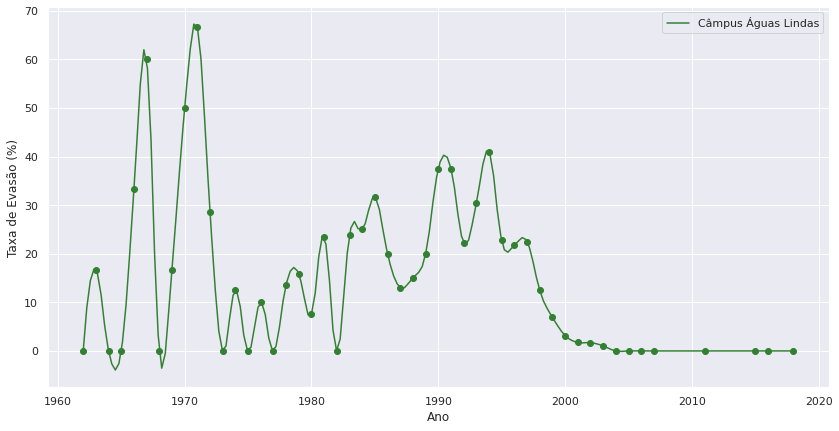

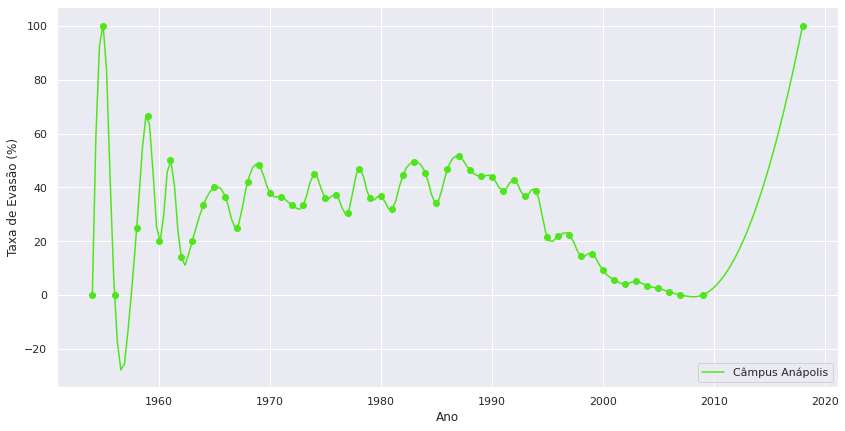

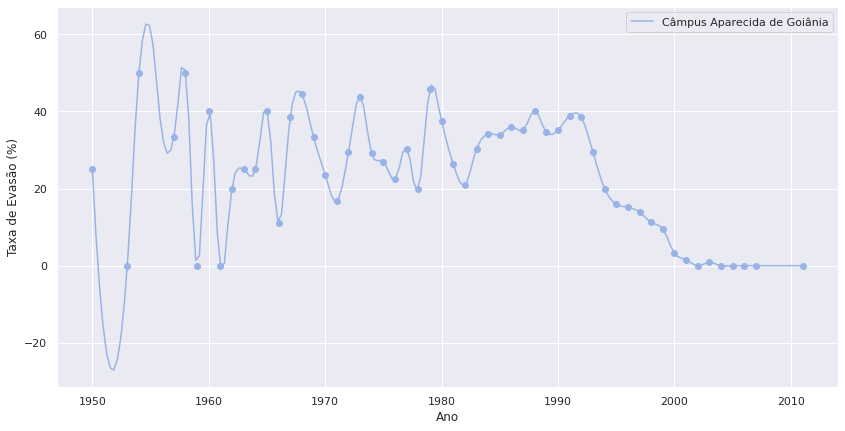

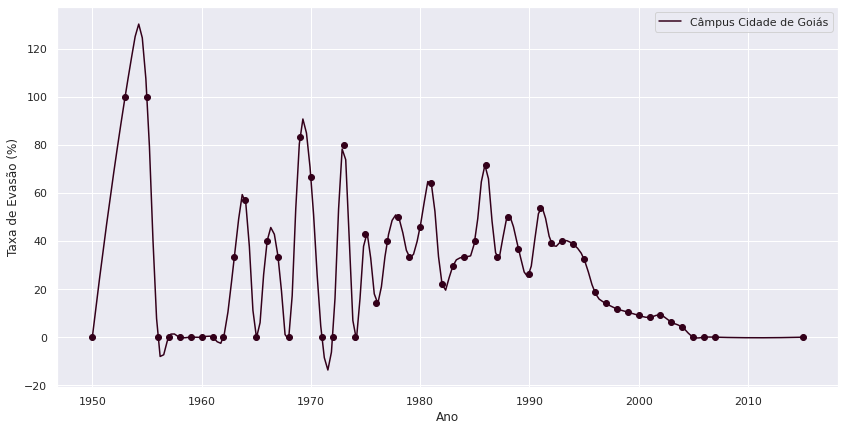

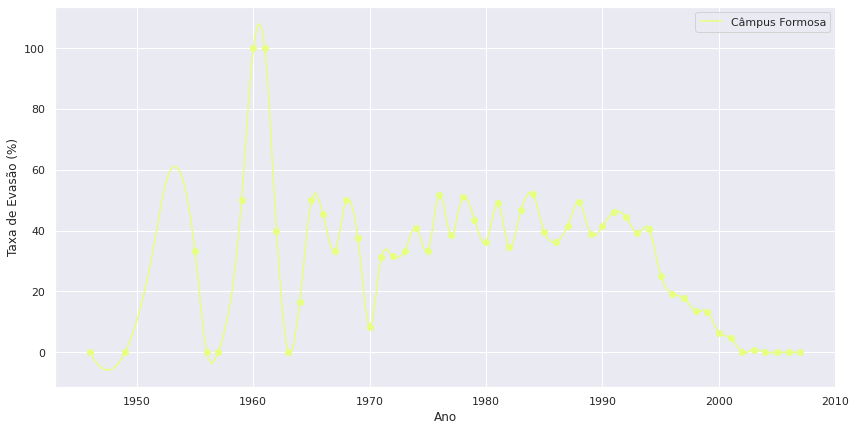

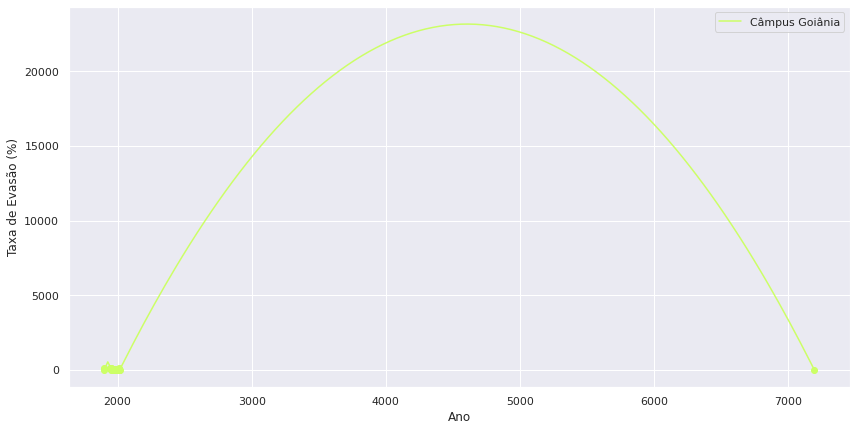

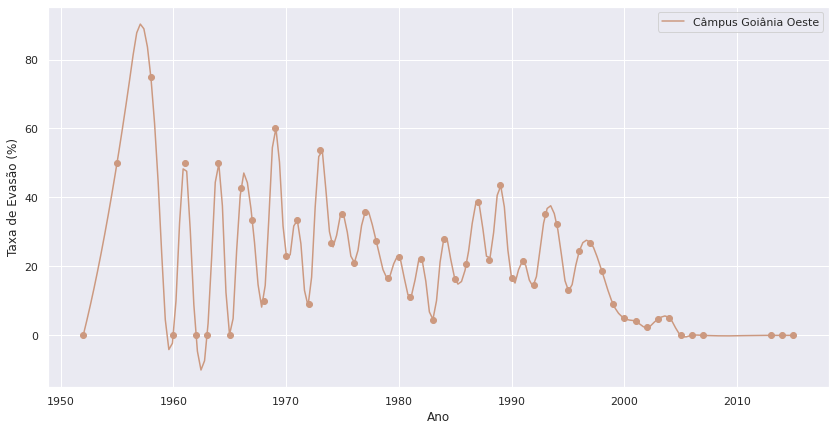

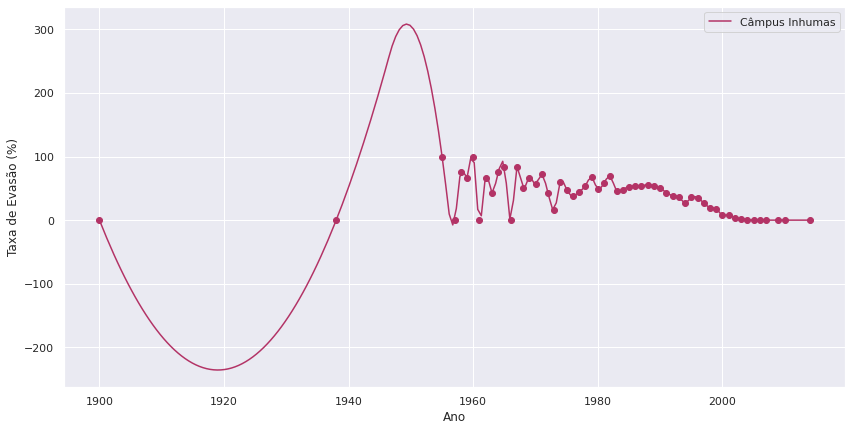

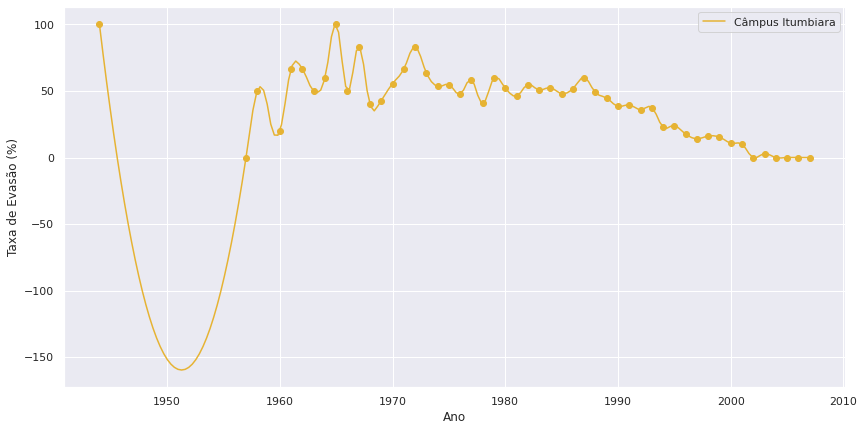

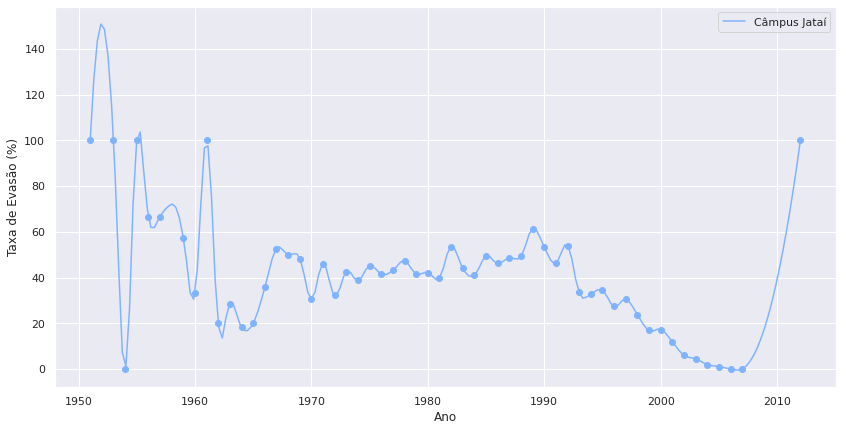

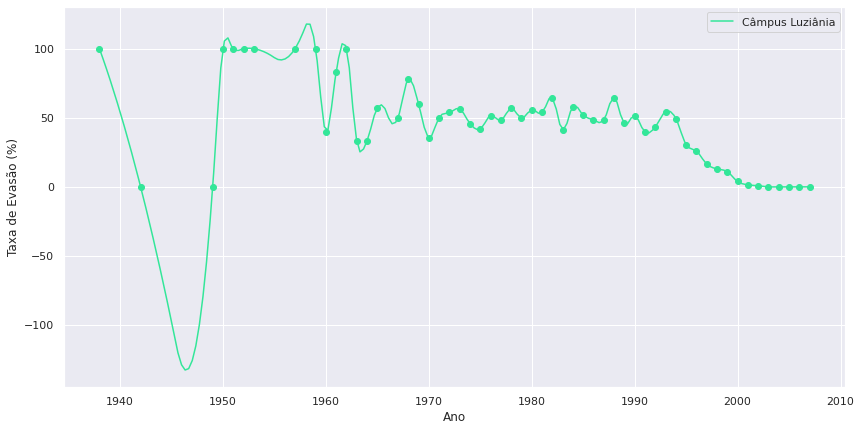

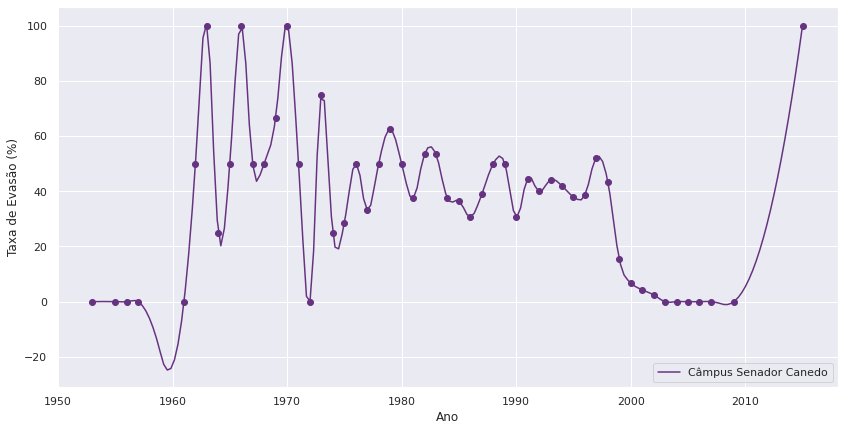

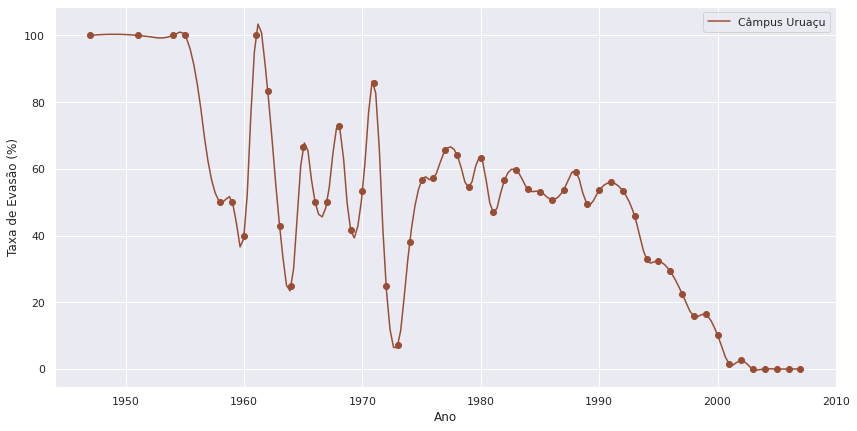

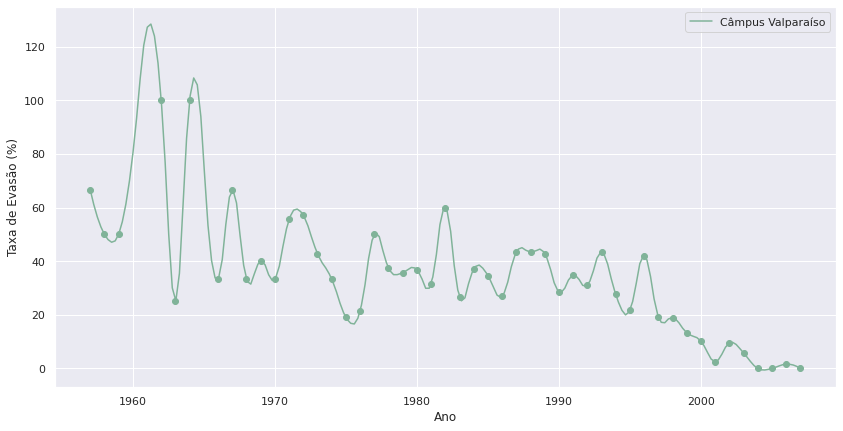

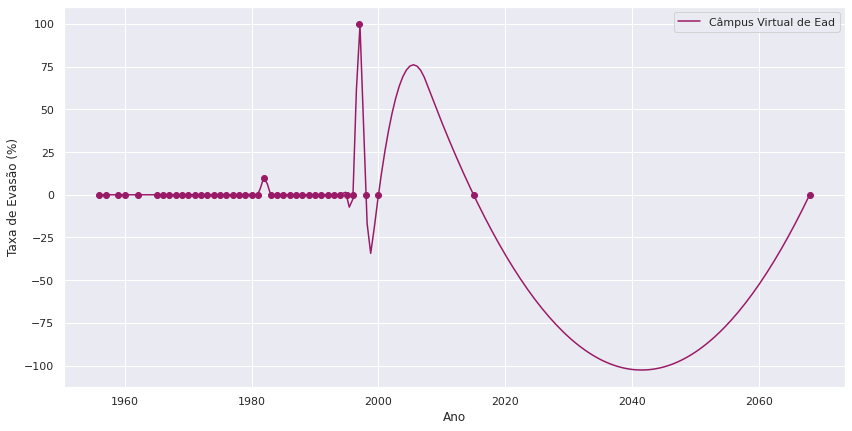

In [84]:
campus = presencial['campus'].unique()

taxa_campus = {}
for cam in campus:
    taxa_campus[cam] = taxa_evasao_ano(presencial, cam)
    x = list(taxa_campus[cam].keys())
    y = list(taxa_campus[cam].values())
    plot_taxa(
        x,
        y,
        color=generete_color(),
        label=cam
    )
    plt.show() # comentar essa linha para comparar todos os campus